Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   

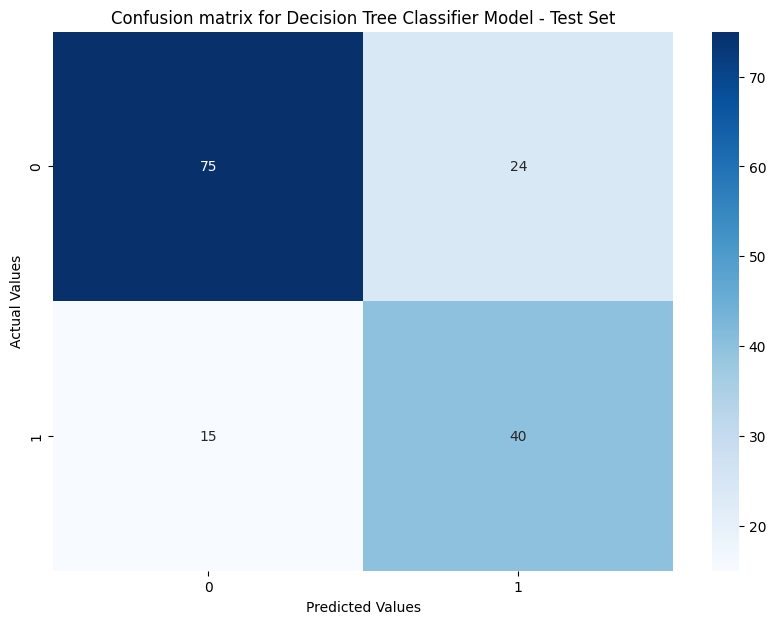


Prediction- New Data
You don't have diabetes.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/MI/Dataset/pima_dataset.csv'

data = pd.read_csv(file_path)
print(data.head(7))
# data.hist(figsize = (15,15))

# Use 'data'  to access data and target
X, y = data.drop('Outcome', axis=1), data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#create and train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
clf.fit(X_train, y_train)

#make prediction and evaluate
y_pred = clf.predict(X_test)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n",cr)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")

plt.figure(figsize=(10,7))
p = sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


# plt.figure(figsize=(20,10))
# plot_tree(clf, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True) # Use plot_tree
# plt.show()

print("\nPrediction- New Data")
new_data_point = pd.DataFrame([[1, 87, 60, 35, 0, 33.1, 0.6, 41]], columns=X.columns)
prediction = clf.predict(new_data_point)
if prediction:
  print("You have diabetes.")
else:
  print("You don't have diabetes.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Accuracy: 0.75


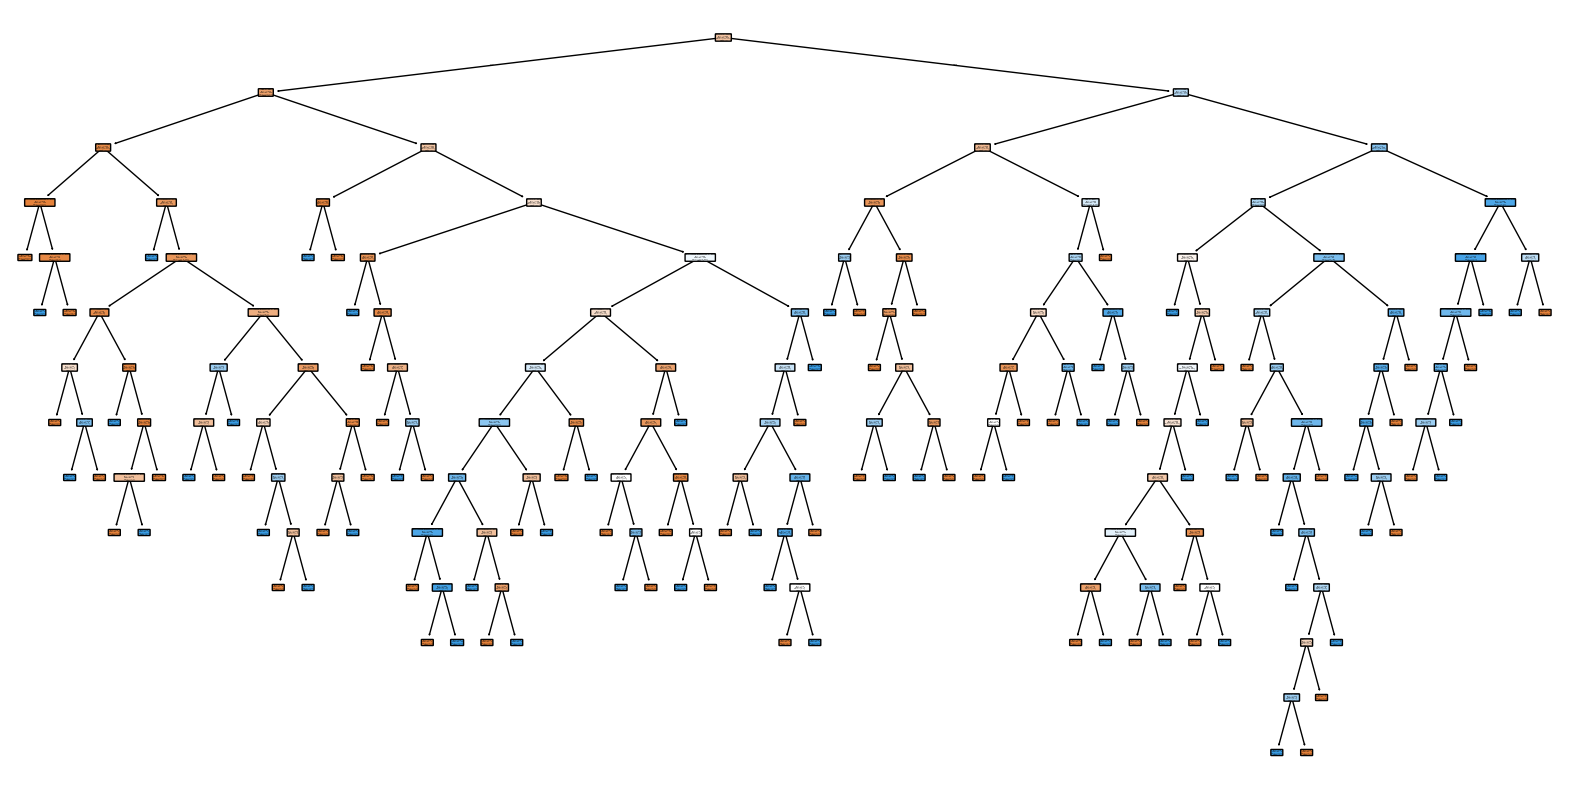

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import DecisionTreeClassifier and plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
file_path = '/content/drive/My Drive/pima_dataset.csv'
data = pd.read_csv(file_path)
data.head()
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Use 'data'  to access data and target
X, y = data.drop('Outcome', axis=1), data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#create and train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
clf.fit(X_train, y_train)

#make prediction and evaluate
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True) # Use plot_tree
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Clssification report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Accuracy: 0.76


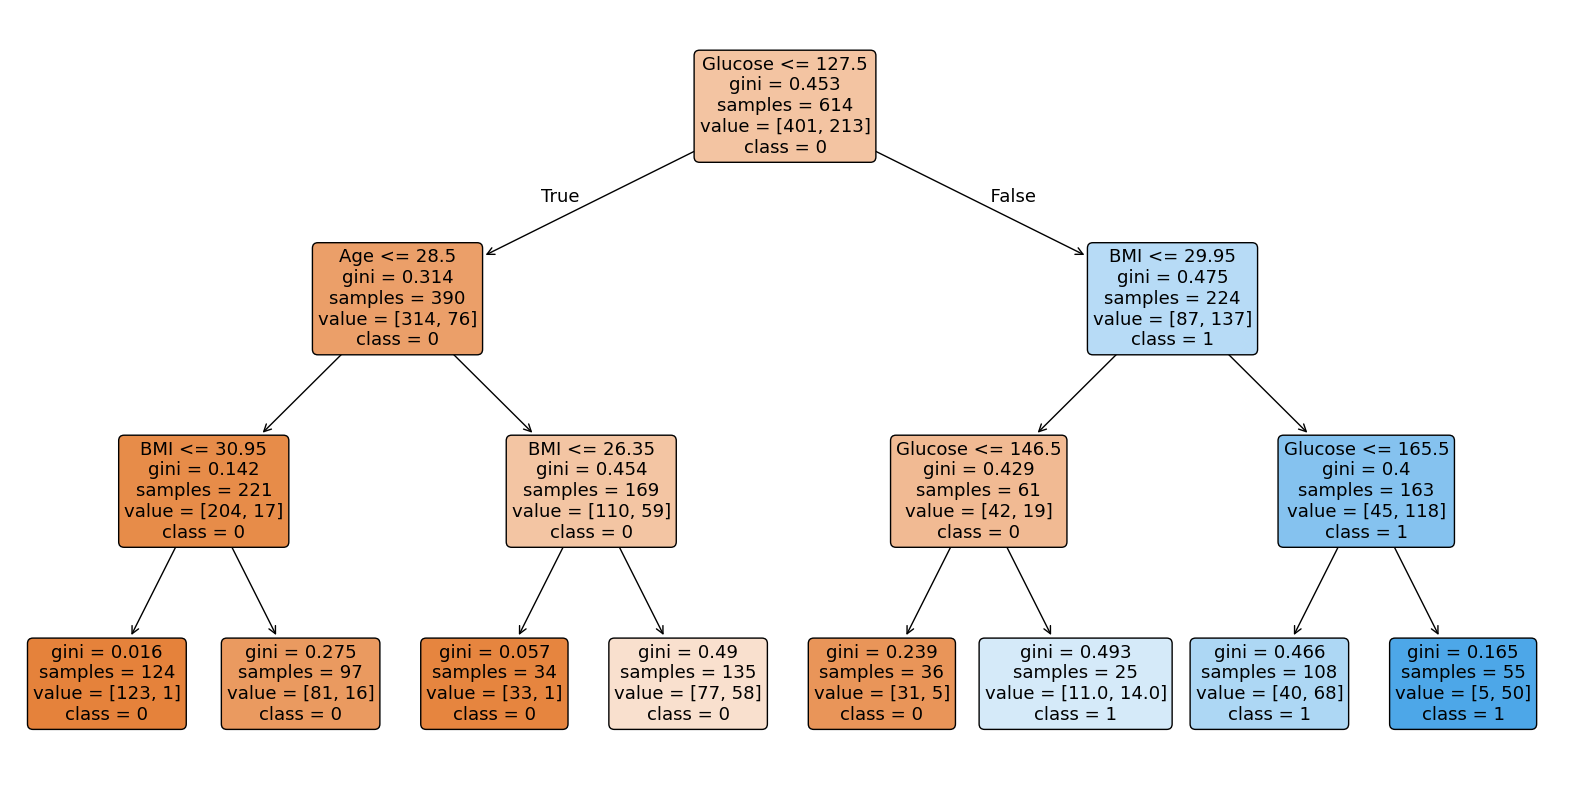

In [ ]:
# prompt: visualization above decision tree such that data can read

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


drive.mount('/content/drive')
# Load the dataset
file_path = '/content/drive/My Drive/pima_dataset.csv'
data = pd.read_csv(file_path)
#data.head() #This line is not needed for the code to work
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Use 'data'  to access data and target
X, y = data.drop('Outcome', axis=1), data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#create and train decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # You can adjust hyperparameters here, max_depth is added for better visualization
clf.fit(X_train, y_train)

#make prediction and evaluate
y_pred = clf.predict(X_test)


print("\nClssification report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True)
plt.show()
